In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Sampled_data.csv')

In [5]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,...,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,0,0,01-01-01-203408001402010,2010,1,1,1,MHNB030001842010,chief judicial magistrate,0 male,...,-9999,-9999,4400,3734.0,19,2010-02-23,2010-02-23,2010-02-23,2010-02-23,2010-02-23
1,1,1,01-01-01-203408003852010,2010,1,1,1,MHNB030005702010,chief judicial magistrate,0 male,...,-9998,0,4400,3280.0,30,2010-06-17,2013-10-17,2010-07-17,2013-10-03,2013-10-17
2,2,2,01-01-01-203408004512010,2010,1,1,1,MHNB030006852010,chief judicial magistrate,0 male,...,-9999,-9998,4400,4834.0,22,2010-07-08,2014-09-16,2010-07-21,2014-08-19,2014-09-16
3,3,3,01-01-01-203408005632010,2010,1,1,1,MHNB030008512010,chief judicial magistrate,0 male,...,0,0,4400,3280.0,4,2010-08-18,2015-01-02,2010-09-06,2014-12-16,2015-01-02
4,4,4,01-01-01-203408007652010,2010,1,1,1,MHNB030010672010,chief judicial magistrate,0 male,...,0,0,4400,3439.0,25,2010-11-12,2013-11-22,2010-12-01,2013-10-25,2013-11-22


# **Identifying Classification Problem 1**
<br>We can use this dataset to predict whether a particular defendant under a given judge will be male, female or other.

We will create a a dataset of independant variable X with the data of 'judge_position' column.

In [6]:
x=data['judge_position']

The variable X which has categorical data has been converted into indicator or dummy variables for better predictions.

In [7]:
X=pd.get_dummies(x)

In [8]:
X.head(5)

,1-additional chief judge court,1-additional civil judge and judicial magistrate,1-additional civil judge junior division,1-additional district and sessions court,1-civil judge junior division,1-district and sessions court,1-jmfc,1-mm court,10-additional chief metropolitan magistrate,10-additional district and sessions court,...,vanthali_addldj court,vi m.m.court (mobile court) cum vi a.j.c.j. vja,vinchhiya_taluka,visavadar_addldj court,visnagar_addldj court,wac,wakf board court complex,wakf tribunal,womens court,"x additional special courts for under pc act, gt,"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now create a target variable Y with data in the column 'female_defendant'

In [9]:
Y=data['female_defendant']

**Splitting the data for modelling**
30% test size and 70% train size.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0,test_size=0.3)

## **MODEL 1- DECISION TREE**

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth =150,criterion='entropy').fit(X_train, y_train)


In [12]:
dtree_predictions = dtree_model.predict(X_test)

Now we will create a function which calculates the accuracy, precision, recall and f1 score when the model, and x and y test sets are passed.
This is beneficial for us in model evaluation.

In [13]:
from numpy.lib.function_base import average
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average='micro')
    rec = metrics.recall_score(y_test, y_pred,average='micro')
    f1 = metrics.f1_score(y_test, y_pred,average='micro')

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)


    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'cm': cm}


Implementing the function 'evaluate_model' created to store the various scores as mentioned above in the variable 'dtc_eval'

In [14]:
dtc_eval = evaluate_model(dtree_model, X_test, y_test)

**Performance Measure Using Confusion Matrix, Classification Report**
-We will now the how the model has performed through confusion matrix and classification report.

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

A function is named'confusion_matrix_classification_report' is created to print the confusion matrix and classification report, so we need to repeatedly use the 2 lines of code,insteas, call the function with the required parameters.

In [16]:
def confusion_matrix_classification_report(test,predict):
  print(confusion_matrix(test,predict))
  print(classification_report(test,predict))

In [17]:
confusion_matrix_classification_report(y_test,dtree_predictions)

[[  427     0 15879    10]
 [    1     0   437     0]
 [  314     0 52939    53]
 [   58     0  9344    38]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.53      0.03      0.05     16316
-9999 missing name       0.00      0.00      0.00       438
            0 male       0.67      0.99      0.80     53306
          1 female       0.38      0.00      0.01      9440

          accuracy                           0.67     79500
         macro avg       0.40      0.26      0.22     79500
      weighted avg       0.61      0.67      0.55     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **MODEL 2- XGBOOST**

In [18]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

Predicting the values and storing it in variable 'preds'.

In [20]:
preds = model.predict(X_test)

Implementing the evaluate_model function to calculate accuracy, precision, recall and f1 score when the model, and x and y test sets are passed.


In [21]:
xgb_eval=evaluate_model( model, X_test, y_test)

**Performance Measure using Confusion Matrix, Classfication Report**

In [22]:
confusion_matrix_classification_report(y_test,preds)


[[  217     0 16099     0]
 [    0     0   438     0]
 [  130     0 53176     0]
 [   17     0  9417     6]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.60      0.01      0.03     16316
-9999 missing name       0.00      0.00      0.00       438
            0 male       0.67      1.00      0.80     53306
          1 female       1.00      0.00      0.00      9440

          accuracy                           0.67     79500
         macro avg       0.57      0.25      0.21     79500
      weighted avg       0.69      0.67      0.54     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  **MODEL 3-K-Nearest-Neighbours**

In [23]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

Predicting the values and storing it in variable named predictions.

In [25]:
predictions= knn.predict(X_test)

Implementing the evaluate_model function to calculate accuracy, precision, recall and f1 score when the model, and x and y test sets are passed.

In [26]:
knn_eval=evaluate_model( knn , X_test, y_test)

**Performance Measures using Confusion Matrix, Classification Report**

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, predictions)

0.6362012578616352

In [29]:
confusion_matrix_classification_report(y_test,predictions)

[[ 2406     1 13796   113]
 [   33     1   402     2]
 [ 4948     6 48061   291]
 [ 1364     1  7965   110]]
                    precision    recall  f1-score   support

     -9998 unclear       0.27      0.15      0.19     16316
-9999 missing name       0.11      0.00      0.00       438
            0 male       0.68      0.90      0.78     53306
          1 female       0.21      0.01      0.02      9440

          accuracy                           0.64     79500
         macro avg       0.32      0.27      0.25     79500
      weighted avg       0.54      0.64      0.56     79500



##**MODEL 4-Logistic Regresion**


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

Predicting the results and storing it in a variable names y_predictions.

In [31]:
y_predictions= classifier.predict(X_test)

Implementing the evaluate_model function to calculate accuracy, precision, recall and f1 score when the model, and x and y test sets are passed.

In [32]:
logi_eval=evaluate_model( classifier , X_test, y_test)

**Performance Measures using Confusion Matrix, Classification Report**

In [33]:
confusion_matrix_classification_report(y_test,y_predictions)

[[  370     0 15938     8]
 [    1     0   437     0]
 [  252     0 53009    45]
 [   52     0  9353    35]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.55      0.02      0.04     16316
-9999 missing name       0.00      0.00      0.00       438
            0 male       0.67      0.99      0.80     53306
          1 female       0.40      0.00      0.01      9440

          accuracy                           0.67     79500
         macro avg       0.40      0.26      0.21     79500
      weighted avg       0.61      0.67      0.55     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Graphical Evaluation Of Performace Of Various Models.**

First, we will create a dataframe with the corresponding Precision,Recall,F1Score,Accuracy scores of various models.
<br>Then we will plot the data frame using the '.plot' method available in the matplotlib library.

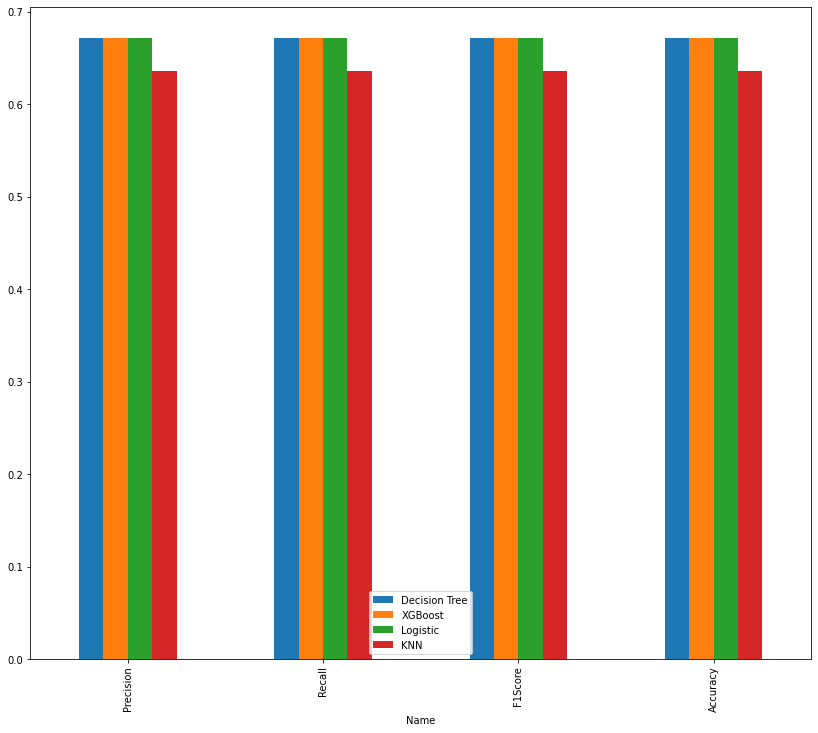

In [34]:
data_evaluation_model=[['Precision',dtc_eval['prec'],xgb_eval['prec'],logi_eval['prec'],knn_eval['prec']],
     ['Recall',dtc_eval['rec'],xgb_eval['rec'],logi_eval['rec'],knn_eval['rec']],
     ['F1Score',dtc_eval['f1'],xgb_eval['f1'],logi_eval['f1'],knn_eval['f1']],
     ['Accuracy',dtc_eval['acc'],xgb_eval['acc'],logi_eval['acc'],knn_eval['acc']]]


df=pd.DataFrame(data_evaluation_model,columns=["Name","Decision Tree","XGBoost","Logistic","KNN"])
df.plot(x="Name", y=["Decision Tree","XGBoost","Logistic","KNN"], kind="bar",figsize=(14,12))

In the above representation, we havegrouped plotted the various precision,recall,F1 and accuracy scores of various models for better evaluation.


# **Identifying Classification Problem 2**
We can use this dataset to predict whether a particular petitioner under a given judge will be male, female or other.

A dataset of independant variable X with the data of 'judge_position' column has already been created for the same.
We will now create a target variable Y with data in the column 'female_petitioner'.

In [35]:
Y=data['female_petitioner']

Splitting the new data Y along with X.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0,test_size=0.3)


## **Model 1 -Decision Tree**

In [37]:
dtree_model = DecisionTreeClassifier(max_depth =50,criterion='entropy').fit(X_train, y_train)

In [38]:
dtree_predictions = dtree_model.predict(X_test)

Implementing the evaluate_model function to calculate teh various scores.

In [39]:
dtc_eval = evaluate_model(dtree_model, X_test, y_test)

Performance Measure Using Confusion_Matrix and Classification Report

In [40]:
confusion_matrix_classification_report(y_test,dtree_predictions)


[[25082     0 13034     0]
 [  182     0    96     0]
 [10939     0 18152     0]
 [ 4873     0  7142     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.61      0.66      0.63     38116
-9999 missing name       0.00      0.00      0.00       278
            0 male       0.47      0.62      0.54     29091
          1 female       0.00      0.00      0.00     12015

          accuracy                           0.54     79500
         macro avg       0.27      0.32      0.29     79500
      weighted avg       0.47      0.54      0.50     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **MODEL 2- XGBOOST**

In [ ]:
model.fit(X_train, y_train)

In [42]:
preds = model.predict(X_test)

In [43]:
xgb_eval=evaluate_model( model, X_test, y_test)

**Performance Measure Using Confusion_Matrix and Classification Report**

In [44]:
confusion_matrix_classification_report(y_test,preds)

[[28502     0  9614     0]
 [  212     0    66     0]
 [15062     0 14029     0]
 [ 6558     0  5457     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.57      0.75      0.64     38116
-9999 missing name       0.00      0.00      0.00       278
            0 male       0.48      0.48      0.48     29091
          1 female       0.00      0.00      0.00     12015

          accuracy                           0.53     79500
         macro avg       0.26      0.31      0.28     79500
      weighted avg       0.45      0.53      0.49     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **MODEL 3- K-NearestNeighbours**

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
predictions=knn.predict(X_test)

In [47]:
accuracy_score(y_test, predictions)

0.5251194968553459

In [48]:
confusion_matrix_classification_report(y_test,predictions)

[[34072     0  3951    93]
 [  262     0    16     0]
 [21374     0  7603   114]
 [ 8550     0  3393    72]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.53      0.89      0.67     38116
-9999 missing name       0.00      0.00      0.00       278
            0 male       0.51      0.26      0.35     29091
          1 female       0.26      0.01      0.01     12015

          accuracy                           0.53     79500
         macro avg       0.32      0.29      0.26     79500
      weighted avg       0.48      0.53      0.45     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
knn_eval=evaluate_model( knn , X_test, y_test)

## **Model 4- LOGISTIC REGRESSION**

In [ ]:
classifier.fit(X_train, y_train)

In [51]:
y_predictions= classifier.predict(X_test)

In [52]:
confusion_matrix_classification_report(y_test,predictions)

[[34072     0  3951    93]
 [  262     0    16     0]
 [21374     0  7603   114]
 [ 8550     0  3393    72]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

     -9998 unclear       0.53      0.89      0.67     38116
-9999 missing name       0.00      0.00      0.00       278
            0 male       0.51      0.26      0.35     29091
          1 female       0.26      0.01      0.01     12015

          accuracy                           0.53     79500
         macro avg       0.32      0.29      0.26     79500
      weighted avg       0.48      0.53      0.45     79500



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
logi_eval=evaluate_model( classifier , X_test, y_test)

## **Graphical evaluation of various models based on the corresponding Precision,Recall,F1Score and Accuracy.**

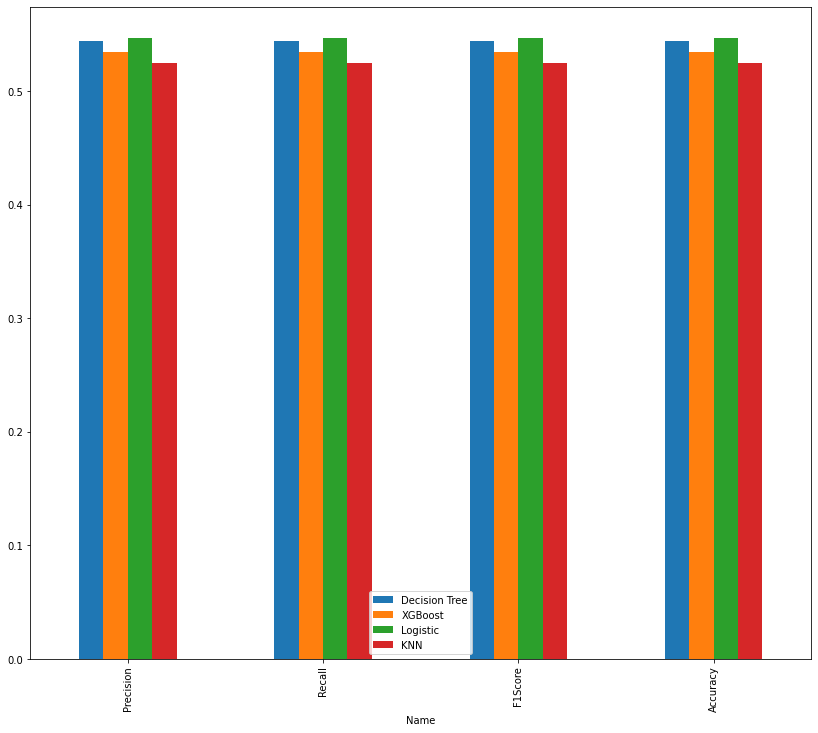

In [54]:
data_evaluation_model=[['Precision',dtc_eval['prec'],xgb_eval['prec'],logi_eval['prec'],knn_eval['prec']],
     ['Recall',dtc_eval['rec'],xgb_eval['rec'],logi_eval['rec'],knn_eval['rec']],
     ['F1Score',dtc_eval['f1'],xgb_eval['f1'],logi_eval['f1'],knn_eval['f1']],
     ['Accuracy',dtc_eval['acc'],xgb_eval['acc'],logi_eval['acc'],knn_eval['acc']]]


df=pd.DataFrame(data_evaluation_model,columns=["Name","Decision Tree","XGBoost","Logistic","KNN"])
df.plot(x="Name", y=["Decision Tree","XGBoost","Logistic","KNN"], kind="bar",figsize=(14,12))

# **Conclusion**

The following insights can be drawn from this :-<br>
<br>**Classification Problem 1**
<br>
<br>1.We have performed classification on the given data to predict the gender of defendant(0-male,1-female,2-uncleaer). We have used the data in 'judge_position column' as an independent variable to predict the corresponpding gender of the petitioner. The model has shown about 64% of accuracy. 
<br>2. We see that KNN model has performed the worst, and all the other models are almost at par with each other.
<br>3.We know that XGBoost is a strong model, but it takes a lot of time to execute. Here, we see that XGBoost,Decision Tree and Logistic Regression have the same accuracy score. Hence, to save time, we can use the latter two instead of XGBoost.
<br>
<br>**Classification Problem 2**
<br>
<br>1.We have performed classification on the given data to predict the gender of petitoner(0-male,1-female,2-uncleaer). We have used the data in 'judge_position column' as an independent variable to predict the corresponpding gender of the petitioner. The model has shown about 64% of accuracy.
<br> 2.From the graphical representation of model performance, we can see that KNN has not performed well again. Hence, we can say that KNN is not a good classifer model when compared to Logistic,Decision Tree and XGBoost.
<br>3. From the confusion matrix, we can se that Decision Tree and XGBoost have performed well in the task with more accuracy.
